In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io as sio
sns.set()

## Load files

In [2]:
# loading files from allen file system mat directory

# mount_point    = '/Users/fruity/Remote-AI-root/allen/aibs' #Rohan's mount point
#mount_point    = '/allen/aibs' #Corinne's mount point
#data_dir       = mount_point + 'mat/Corinne/autoencoder/'
#embeddings_dir = mount_point+'mat/Corinne/autoencoder/embeddings/'

# Load Corinne's data file:
#dat_df=pd.read_csv(data_dir+'autoencoder_data_09_06_2019.csv', sep='#',low_memory=False)

# Load embeddings:
#mat = sio.loadmat(embeddings_dir+'std_data_run_0_cv_0_ng_500_pd_0-5_bs_1000_ld_2_ne_5000_ri_0-summary.mat', \
#                  squeeze_me=True)

In [4]:
# loading files locally
#dat_df=pd.read_csv('autoencoder_data_09_06_2019.csv', sep='#',low_memory=False) #old file that actual embedding was done on
dat_df = pd.read_csv('ae_data_09_06_2019UPDATE.csv', sep='#',low_memory=False) #new file with added descriptive columns
Z2D = sio.loadmat('std_data_run_0_cv_0_ng_500_pd_0-5_bs_1000_ld_2_ne_5000_ri_0-summary.mat', \
                  squeeze_me=True)
num_descriptive_features = 10 #might want to verify this
dat_df.keys()[0:num_descriptive_features] #

Index(['pair_identifier', 'stp_induction_50hz', 'pre_ex', 'post_ex',
       'pre_class', 'post_class', 'pre_cre', 'post_cre', 'pre_layer',
       'post_layer'],
      dtype='object')

In [11]:
dat_df.keys()[0:11]

Index(['pair_identifier', 'stp_induction_50hz', 'pre_ex', 'post_ex',
       'pre_class', 'post_class', 'pre_cre', 'post_cre', 'pre_layer',
       'post_layer', '('ic, 10.0, 0.25', 'amp', 1)'],
      dtype='object')

In [5]:
#Separate out the annotations:
anno_df = dat_df[dat_df.keys().values[0:num_descriptive_features]]
print('anno_df: ', anno_df.columns.values)

anno_df:  ['pair_identifier' 'stp_induction_50hz' 'pre_ex' 'post_ex' 'pre_class'
 'post_class' 'pre_cre' 'post_cre' 'pre_layer' 'post_layer']


The features are sparsely populated. Only ~500 features have ~ at least 10% non-nans across cells.

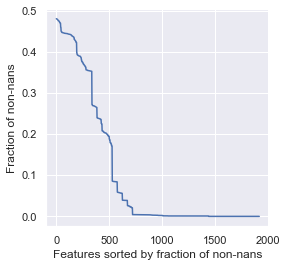

In [6]:
feature_list = dat_df.keys().values[num_descriptive_features:]
data = dat_df[feature_list].values

#Fraction of non-nans per feature:
plt.figure(figsize=(4,4))
plt.plot(1 - np.sort(np.sum(np.isnan(data)/np.shape(data)[0],axis = 0)))
ax = plt.gca()
ax.set_ylabel('Fraction of non-nans')
ax.set_xlabel('Features sorted by fraction of non-nans')
plt.show()

In [7]:
#Feature indices sorted by fraction of nans:
keep_n_features = 500
ind = np.argsort(np.sum(np.isnan(data)/np.shape(data)[0],axis = 0))
keep = ind[0:keep_n_features] #Because sorting is in ascending order
data_sorted = data[:,keep]
mask_sorted = np.isnan(data_sorted).astype('float')
feature_list_sorted = feature_list[keep]

In [8]:
for f in feature_list_sorted: print(f)

('ic, 50.0, 0.25', 'latency', 2)
('ic, 50.0, 0.25', 'rise_time', 2)
('ic, 50.0, 0.25', 'amp', 4)
('ic, 50.0, 0.25', 'decay_tau', 2)
('ic, 50.0, 0.25', 'rise_time', 4)
('ic, 50.0, 0.25', 'latency', 4)
('ic, 50.0, 0.25', 'amp', 2)
('ic, 50.0, 0.25', 'decay_tau', 4)
('ic, 50.0, 0.25', 'rise_time', 3)
('ic, 50.0, 0.25', 'latency', 3)
('ic, 50.0, 0.25', 'amp', 3)
('ic, 50.0, 0.25', 'decay_tau', 3)
('ic, 50.0, 0.25', 'rise_time', 5)
('ic, 50.0, 0.25', 'amp', 5)
('ic, 50.0, 0.25', 'decay_tau', 5)
('ic, 50.0, 0.25', 'latency', 5)
('ic, 50.0, 0.25', 'rise_time', 10)
('ic, 50.0, 0.25', 'amp', 10)
('ic, 50.0, 0.25', 'latency', 10)
('ic, 50.0, 0.25', 'decay_tau', 10)
('ic, 50.0, 0.25', 'rise_time', 11)
('ic, 50.0, 0.25', 'latency', 11)
('ic, 50.0, 0.25', 'amp', 11)
('ic, 50.0, 0.25', 'decay_tau', 11)
('ic, 50.0, 0.25', 'amp', 6)
('ic, 50.0, 0.25', 'rise_time', 6)
('ic, 50.0, 0.25', 'decay_tau', 6)
('ic, 50.0, 0.25', 'latency', 6)
('ic, 50.0, 0.25', 'latency', 12)
('ic, 50.0, 0.25', 'decay_tau', 12

Data values are quite small; `median` values for the features is `~0.02`. 

Text(0.5, 0, 'Features')

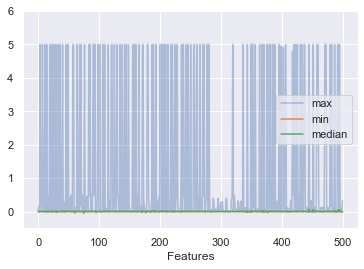

In [9]:
plt.figure()
plt.plot(np.nanmax(data_sorted,axis=0),alpha = 0.4,label='max')
plt.plot(np.nanmin(data_sorted,axis=0),alpha = 1,label='min')
plt.plot(np.nanmedian(data_sorted,axis=0),alpha = 1,label='median')
plt.legend()
ax = plt.gca()
ax.set_ylim(-0.5,6)
ax.set_xlabel('Features')

Final layer of the network is chosen to have a linear activation function since the dataset is standardized.

Text(0.5, 0, 'Feature values')

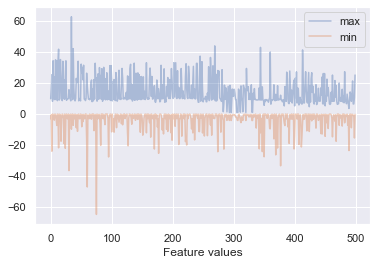

In [10]:
#Standardize data:
norm_data = (data_sorted - np.nanmean(data_sorted,axis=0))/(np.nanstd(data_sorted,axis=0)+1e-10)
plt.figure()
plt.plot(np.nanmax(norm_data,axis=0),alpha = 0.4,label='max')
plt.plot(np.nanmin(norm_data,axis=0),alpha = 0.4,label='min')
plt.legend()
ax = plt.gca()
ax.set_xlabel('Features')
ax.set_xlabel('Feature values')

In [ ]:
# impute data to fill in nans
from sklearn.impute import SimpleImputer
imputed = SimpleImputer(missing_values=np.nan, strategy='median').fit_transform(norm_data)
imputed.shape
#np.save('median_imputed_array_09_26_2019.npy', imputed)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit_transform(imputed)

In [ ]:
plt.figure()
plt.scatter(pca[:,0], pca[:,1])
plt.show()

In [ ]:
#this takes a very long time
# from sklearn.manifold import TSNE
# tsne_embedded = TSNE(n_components=2).fit_transform(imputed)

In [ ]:
# tsne_embedded.shape
# plt.figure()
# plt.scatter(tsne_embedded[:,0], tsne_embedded[:,1])
# plt.show()

In [ ]:
#Append z to the annotations:
anno_df = anno_df.assign(aec0=mat['z'][:,0])
anno_df = anno_df.assign(aec1=mat['z'][:,1])
anno_df = anno_df.assign(pca0=pca[:,0])
anno_df = anno_df.assign(pca1=pca[:,1])
anno_df = anno_df.assign(tsne0=tsne_embedded[:,0])
anno_df = anno_df.assign(tsne1=tsne_embedded[:,1])

In [ ]:
print(mat['z'][:,1].shape)
print(pca[:,0].shape)
print(anno_df.shape)
print(anno_df.keys())

In [ ]:
#Create a single label by concatenating pre_cre,post_cre,pre_layer, and post_layer labels
anno_df = anno_df.assign(combined_anno=(anno_df['pre_cre'].map(str) + '_' + anno_df['post_cre'].map(str) + '_' 
                   +anno_df['pre_layer'].map(str) +'_' +anno_df['post_layer'].map(str)).astype('str'))

In [ ]:
#Assign numeric ids to unique rows. `1000` is assigned to any rows containing `unknown` or `nan`
#anno_df = anno_df.assign(id=(anno_df['combined_anno']).astype('category').cat.codes)
#anno_df.loc[anno_df['combined_anno'].str.contains('unknown') | anno_df['combined_anno'].str.contains('nan'),'id']=1000

#Select only cells with no nans or unkowns in the annotation columns.
#X = anno_df.loc[anno_df['id'].values!=1000,['aec0','aec1','id','pre_post_cre','combined_anno','pre_cell','post_cell','pre_cre','post_cre','pre_layer','post_layer']]

Next block keeps all the rows in the dataset

In [ ]:
#Create a single label by concatenating pre_cre and post_cre labels
anno_df = anno_df.assign(pre_post_cre=(anno_df['pre_cre'].map(str) + '_' + anno_df['post_cre'].map(str)))
X = anno_df



## Start here if you are just using saved emeddings

In [ ]:
#X.to_csv('aec_pca_tsne_09_26_2019.csv', sep='#')
X = pd.read_csv('aec_pca_tsne_09_26_2019.csv', sep='#',low_memory=False)
X.keys()

In [ ]:
#Number of rows for each unique annotation:
for i in ['pre_cell','post_cell','pre_cre','post_cre','pre_layer','post_layer','pre_post_cre']:
    print('\n-----')
    print(X[i].value_counts())

In [ ]:
# no longer needed with updated file
# # test to make cre excitation is specified and there is not new cre-lines in the data
# known_pre_cre = ['sst', 'unknown', 'pvalb', 'sim1', 'ntsr1', 'tlx3', 'vip', 'nr5a1','cux2', 'rorb', 'rbp4', 'slc17a8', 'pvalb,sim1', 'pvalb,sst']
# known_post_cre = ['unknown', 'pvalb', 'sst', 'sim1', 'tlx3', 'vip', 'nr5a1', 'rorb', 'ntsr1', 'rbp4', 'slc17a8', 'cux2', 'fam84b'] 
# if X['pre_cre'].unique().any() not in known_pre_cre:
#     raise Exception('there are new pre synaptic cre lines')
# if X['post_cre'].unique().any() not in known_post_cre:
#     raise Exception('there are new post synaptic cre lines')

# # specify excitatory and inhibitory cre-lines
# excitation_specification= {'unknown': 'U',
#                            'pvalb,sim1': 'U',
#                            'pvalb': 'I',
#                            'sst': 'I', 
#                            'vip': 'I',
#                            'pvalb,sst': 'I',    
#                            'sim1': 'E',
#                            'tlx3': 'E',              
#                            'nr5a1': 'E',  
#                            'rorb': 'E',
#                            'ntsr1': 'E',
#                            'rbp4': 'E',
#                            'slc17a8': 'E',
#                            'cux2': 'E',
#                            'fam84b': 'E'}
# # check to make sure all cre-lines are specified
# if np.any([k not in excitation_specification.keys()for k in known_pre_cre]) | \
#     np.any([k not in excitation_specification.keys()for k in known_post_cre]): 
#     raise Exception('a cre line is not defined')
    
# X = X.assign(pre_excitation=[excitation_specification[a] for a in X['pre_cre']]) 
# X = X.assign(post_excitation=[excitation_specification[a] for a in X['post_cre']]) 
# X = X.assign(pre_post_excitation=[excitation_specification[a]+'_'+excitation_specification[b] for a,b in zip(X['pre_cre'], X['post_cre'])]) 

In [ ]:
# change columns to strings incase there is a nan
for anno in ['expt','pre_cell','post_cell','pre_cre','post_cre','pre_layer','post_layer']:
    X[anno]=X[anno].astype('str')


In [ ]:
#For each every unique label in list 'anno_type', plot scatter maps:
def plot_single_catagory(method, xlim, ylim, color='r'): #'pca' or 'aec'
    for annotype in ['pre_cell','post_cell','pre_cre','post_cre','pre_layer','post_layer', 'pre_excitation',
       'post_excitation']:
        i=0
        print(annotype)
        for label in np.unique(X[annotype]):
            if i%4==0:
                plt.figure(figsize=(13,3.7))
                i=0
            plt.subplot(1,4,i+1)
            ind = X[annotype]==label
            plt.scatter(X[method+'0'][~ind],X[method+'1'][~ind],s=1,c='#CCCCCC',alpha=1)
            plt.scatter(X[method+'0'][ind],X[method+'1'][ind],s=1,c=color,alpha=1)
            ax = plt.gca()
            ax.set_xlim(xlim)
            ax.set_ylim(ylim)
            ax.set_title(str(annotype)+' - '+str(label))  
            i=i+1
            plt.tight_layout()
        plt.show()
    

In [ ]:
plot_single_catagory('aec', [-3,4], [-3,4])

In [ ]:
plot_single_catagory('pca', [-30,90], [-50,90], color='b')

In [ ]:
plot_single_catagory('tsne', [-50,60], [-70,60], color='g')

In [ ]:
def plot_pre_post_cre_combo(method, xlim, ylim, color='r'): #'pca' or 'aec'
    i=0
    for annotype in ['pre_post_cre', 'pre_post_excitation']:
        for label in np.unique(X[annotype]):
            if i%4==0:
                plt.figure(figsize=(15,4))
                i=0
            plt.subplot(1,4,i+1)
            ind = X[annotype]==label
            plt.scatter(X[method+'0'][~ind],X[method+'1'][~ind],s=1,c='#CCCCCC',alpha=1)
            plt.scatter(X[method+'0'][ind],X[method+'1'][ind],s=1,c=color,alpha=1)

            ax = plt.gca()
            ax.set_xlim(xlim)
            ax.set_ylim(ylim)
            idx = str(annotype)+' - '+str(label)
            idx = str(label)
            ax.set_title(idx+' n='+str(np.sum(ind)))

            plt.tight_layout()
            i+=1
            fname = ('./pre_post_cre/{}.png').format(idx)

            #plt.savefig(fname,dpi=600)
        plt.show()
        #plt.close()
        

In [ ]:
plot_pre_post_cre_combo('aec', [-3,4], [-3,4])

In [ ]:
plot_pre_post_cre_combo('pca', [-30,90], [-50,90], color='b')

In [ ]:
plot_pre_post_cre_combo('tsne', [-50,60], [-70,60], color='g')

In [ ]:
# #Use joins to combine labels
# pre_layer_df = pd.DataFrame({'pre_layer':['2/3','4','5','6'],
#                              'pre_layer_color':[1,2,3,4]})
# X = X.join(pre_layer_df.set_index('pre_layer'), on='pre_layer')
# X = X.join(post_layer_df.set_index('post_layer'), on='post_layer')
# X = X.join(pre_cre_df.set_index('pre_cre'), on='pre_cre')
# X = X.join(post_cre_df.set_index('post_cre'), on='post_cre')

In [ ]:
# #Sanity check for network training:
# loss = pd.read_csv(data_dir+'logs/std_data_run_0_cv_0_ng_500_pd_0-5_bs_1000_ld_2_ne_5000_ri_0.csv',sep=',')
# plt.figure(figsize = (3,3))
# plt.plot(loss['epoch'],loss['loss'],label='Train')
# plt.plot(loss['epoch'],loss['val_loss'],label='Val')
# ax = plt.gca()
# ax.set_xlabel('Epochs')
# ax.set_ylabel('Masked MSE')
# ax.set_ylim(0.13,0.16)
# plt.legend()
# plt.show()